# Predicting the gender of the consumer using Black Friday Dataset
Capstone Project 1 for Springboard Data Science Career Track

Caixuan Sun

In [1]:
%matplotlib inline
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import MaxNLocator
sns.set()

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA

# Table of Contents

* [1. Introduction](#1.-Introduction)
    * [1.1 Problem Statement](#1.1-Problem-Statement)
    * [1.2 Data Collection](#1.2-Data-Collection)
* [2. Data Wrangling and EDA](#2.-Data-Wrangling-and-EDA)
    * [2.1 Data Understanding and Cleaning](#2.1-Data-Understanding-and-Cleaning)
    * [2.2 EDA](#2.2-EDA)
        * [2.2.1 Univariate Analysis](#2.2.1-Univariate-Analysis)
            * [2.2.1.1 Distribution of categorical variables](#2.2.1.1-Distribution-of-categorical-variables)
            * [2.2.1.2 Distribution of numerical variables](#2.2.1.2-Distribution-of-numerical-variables)
        * [2.2.2 Bivariate Analysis](#2.2.2-Bivariate-Analysis)
            * [2.2.2.1 Gender Related Analysis](#2.2.2.1-Gender-Related-Analysis)
                * [2.2.2.1.1 More Analysis on Gender Itself](#2.2.2.1.1-More-Analysis-On-Gender-Itself)
                * [2.2.2.1.2 Gender and Purchase](#2.2.2.1.2-Gender-and-Purchase)
                * [2.2.2.1.3 Gender and Age](#2.2.2.1.3-Gender-and-Age)
                * [2.2.2.1.4 Gender and Occupation](#2.2.2.1.4-Gender-and-Occupation)
                * [2.2.2.1.5 Gender and City Category](#2.2.2.1.5-Gender-and-City-Category)
                * [2.2.2.1.6 Gender and Stay in Current City Years](#2.2.2.1.6-Gender-and-Stay-in-Current-City-Years)
                * [2.2.2.1.7 Gender and Marital Status](# 2.2.2.1.7-Gender-and-Marital-Status)
                * [2.2.2.1.8 Gender and Product Category 1](#2.2.2.1.8-Gender-and-Product-Category-1)
                * [2.2.2.1.9 Gender and Products](#2.2.2.1.9-Gender-and-Products)
            * [2.2.2.2 Other Bivariate Analysis](#2.2.2.2-Other-Bivariate-Analysis)
* [3 Machine Learning](#3-Machine-Learning)
    * [3.1 Introduction](#3.1-Introduction)
    * [3.2 Data Preprocessing](#3.2-Data-Preprocessing)
        * [3.2.1 Standardizing Numerical Data](#3.2.1-Standardizing-Numerical-Data)
        * [3.2.2 Encoding Categorical Data](#3.2.2-Encoding-Categorical-Data)
    * [3.3 Model Comparison](#3.3-Model-Comparison)
        * [3.3.1 Logistic Regression](#3.3.1-Logistic-Regression)
        * [3.3.2 K-Nearest Neighbors Classifier](#3.3.2-K-Nearest-Neighbors-Classifier)
        * [3.3.3 SVC](#3.3.3-SVC)
        * [3.3.4 Random Forest Classifier](#3.3.4-Random-Forest-Classifier)
        * [3.3.5 Gradient Boosting Classifier](#3.3.5-Gradient-Boosting-Classifier)

## 1. Introduction

### 1.1 Problem Statement

Retail data has been increasing exponentially in both volume and value. With the massive amounts of data available,  the retail industry is able to rely on data science to extract insights to attract and retain customers, discover trends, operate business more efficiently and ultimately increase sales and reduce costs. For the first project, I would like to focus on consumers and their behaviors. It is greatly beneficial for the retail store to know their customers well. By identifying who is the retail store selling to and what they are buying, better decisions regarding personalized offers and product recommendations could be made. The specific goal for the project is to predict the gender of the consumer which could help the retail store to construct more targeted marketing strategies.  


### 1.2 Data Collection

- Data is obtained from Kaggle: https://www.kaggle.com/mehdidag/black-friday
- The dataset is a sample of transactions made in a retail store for one month. It contains customer demographics such as age, gender and marital status, product details including product id and product category, and purchase amount for the whole month.

## 2. Data Wrangling and EDA

### 2.1 Data Understanding and Cleaning

In [2]:
# Load dataset and check the first few rows
retail_data = pd.read_csv('BlackFriday.csv')
retail_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# Check if there's any duplicated rows
retail_data.duplicated().sum()

0

In [4]:
# Convert column names to lower case
retail_data.columns = [col.lower() for col in retail_data.columns]

In [5]:
# Examine if all column labels are of type string
all(isinstance(column, str) for column in retail_data.columns)

True

In [6]:
# Check the data types for each column and total count of null entries 
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
user_id                       537577 non-null int64
product_id                    537577 non-null object
gender                        537577 non-null object
age                           537577 non-null object
occupation                    537577 non-null int64
city_category                 537577 non-null object
stay_in_current_city_years    537577 non-null object
marital_status                537577 non-null int64
product_category_1            537577 non-null int64
product_category_2            370591 non-null float64
product_category_3            164278 non-null float64
purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [7]:
# Convert categorical features into 'category' data type
cat_cols = ['gender', 'age', 'occupation', 'city_category', 'stay_in_current_city_years',
            'marital_status', 'product_category_1', 'product_category_2','product_category_3']
retail_data[cat_cols] = retail_data[cat_cols].apply(lambda x: x.astype('category'), axis=0)

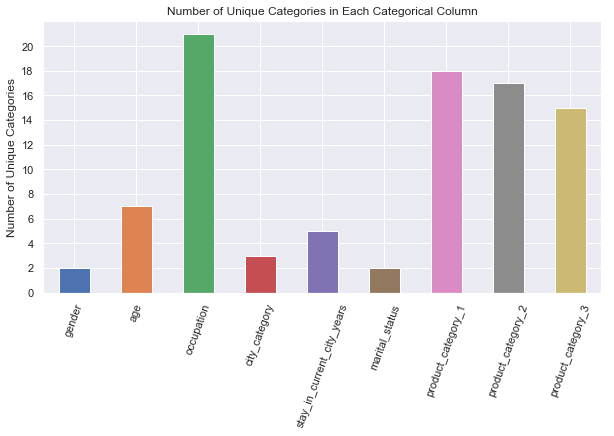

In [8]:
# See how many categories in each categorical column
plt.figure(figsize=(10, 5))
num_unique_cat = retail_data[cat_cols].apply(pd.Series.nunique, axis=0)
num_unique_cat.plot(kind='bar')
plt.xticks(rotation=70)
plt.yticks(np.arange(0, 22, 2))
plt.ylabel('Number of Unique Categories')
plt.title('Number of Unique Categories in Each Categorical Column');

From retail_data.info(), we find that only product_category_2 and product_category_3 have null entries. Use value_counts to futher check if there are other missing values not in the form of 'NaN'. 

In [9]:
for col in retail_data.columns:
    print('Value counts for {} is \n{}'.format(col, retail_data[col].value_counts(dropna=False).head(20)))

Value counts for user_id is 
1001680    1025
1004277     978
1001941     898
1001181     861
1000889     822
1003618     766
1001150     752
1001015     739
1002909     717
1001449     714
1002063     708
1004344     705
1003391     697
1003841     697
1000424     694
1004510     690
1001980     684
1005795     680
1001088     679
1004227     676
Name: user_id, dtype: int64
Value counts for product_id is 
P00265242    1858
P00110742    1591
P00025442    1586
P00112142    1539
P00057642    1430
P00184942    1424
P00046742    1417
P00058042    1396
P00059442    1384
P00145042    1384
P00237542    1374
P00255842    1354
P00117942    1346
P00110942    1336
P00010742    1331
P00110842    1260
P00220442    1253
P00051442    1233
P00102642    1228
P00117442    1227
Name: product_id, dtype: int64
Value counts for gender is 
M    405380
F    132197
Name: gender, dtype: int64
Value counts for age is 
26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903


It seems that there are no missing values in other forms. Then investigate a little bit more about the two columns having null entries. Notice that product_category_1 has 18 categories from 1 to 18, product_category_2 has 17 categories from 2 to 18, and product_category_3 has 16 categories from 3 to 18. 

In [10]:
# See several rows with product_category_2 being null
retail_data[retail_data['product_category_2'].isnull()].head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871
11,1000005,P00014542,M,26-35,20,A,1,1,8,NaN,NaN,3957


For those observations with null product_category_2, they fall into different categories of product_category_1. 

In [11]:
retail_data[retail_data['product_category_2'].isnull() & retail_data['product_category_3'].notnull()]

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase


For those with null product_category_2, their product_category_3 must also be null.

In [12]:
# Check different combinations for product_category_1 and product_category_2
category_12= retail_data[['product_category_1','product_category_2']]
category_12.groupby(['product_category_1','product_category_2']).size()

product_category_1  product_category_2
1                   2.0                   48481
                    3.0                     118
                    4.0                     676
                    5.0                   11127
                    6.0                   10507
                    8.0                   15251
                    11.0                   4761
                    13.0                   1008
                    14.0                   4496
                    15.0                  18281
                    16.0                  14602
                    17.0                   1842
                    18.0                    705
2                   3.0                    2717
                    4.0                    7997
                    5.0                    4099
                    6.0                     185
                    8.0                    2577
                    9.0                    1488
                    12.0                    142
 

In [13]:
# Check different combinations for product_category_2 and product_category_3
category_23 = retail_data[['product_category_2','product_category_3']]
category_23.groupby(['product_category_2','product_category_3']).size()

product_category_2  product_category_3
2.0                 3.0                     600
                    4.0                     513
                    5.0                    7877
                    6.0                    1903
                    8.0                    2765
                    9.0                    4350
                    11.0                   1559
                    13.0                   1333
                    14.0                   3487
                    15.0                  14657
                    16.0                   3443
                    17.0                    194
                    18.0                    212
3.0                 4.0                    1327
                    10.0                    968
                    15.0                    540
4.0                 5.0                    8503
                    8.0                    1593
                    9.0                    3682
                    12.0                   4796
 

- For now, we know that all products must fall into one category under product_category_1. 
- Some of them then fall into a category under product_category_2 while some not.
- There is no product that not belongs to a category in product_category_2 while belongs to a category in product_category_3. As long as this product doens't fall into any category under product_category_2, it will not fall into any category under product_category_3.
- The category number under product_category_1 for a product must be lower than its category number under the other two categories. for example, if this product is in category 5 for product_category_1, then it's category must be greater than 5 for product_category_2, let's say it's 8, then for product_category_3, it must be greater than 8.

In [14]:
# Filling NaNs in product_category_2 and product_category_3
retail_data['product_category_2'] = retail_data['product_category_2'].cat.add_categories(0)
retail_data['product_category_2'].fillna(0, inplace=True)

retail_data['product_category_3'] = retail_data['product_category_3'].cat.add_categories(0)
retail_data['product_category_3'].fillna(0, inplace=True)

### 2.2 EDA

In [15]:
# How many consumers?
print('There are {} consumers.'.format(retail_data['user_id'].nunique()))

There are 5891 consumers.


In [16]:
# How many unique kinds of products were sold?
print('Number of unique kinds of products sold in this store is {}.'.format(retail_data['product_id'].nunique()))

Number of unique kinds of products sold in this store is 3623.


In [17]:
# Create a new data frame for each consumer's individual features
user_info = retail_data.groupby('user_id')[['gender', 'age', 'occupation', 'city_category', 
                                         'stay_in_current_city_years', 'marital_status']].first()
user_info['total_purchase'] = retail_data.groupby(['user_id']).purchase.sum()
user_info['n_purchases'] = retail_data.groupby(['user_id'])['product_id'].count()
user_info.reset_index(inplace=True)
user_info.head()

,user_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,total_purchase,n_purchases
0,1000001,F,0-17,10,A,2,0,333481,34
1,1000002,M,55+,16,C,4+,0,810353,76
2,1000003,M,26-35,15,A,3,0,341635,29
3,1000004,M,46-50,7,B,2,1,205987,13
4,1000005,M,26-35,20,A,1,1,821001,106


In [18]:
user_info.shape

(5891, 9)

#### 2.2.1 Univariate Analysis 

##### 2.2.1.1 Distribution of categorical variables

In [19]:
# Make a function to plot bar graph
def plot_bar(data, feature):
    '''plot bar graph for feature in dataframe'''
    data[feature].value_counts().sort_index().plot(kind='bar')
    plt.title('Bar Plot for {}'.format(feature))
    plt.xticks(rotation=360)

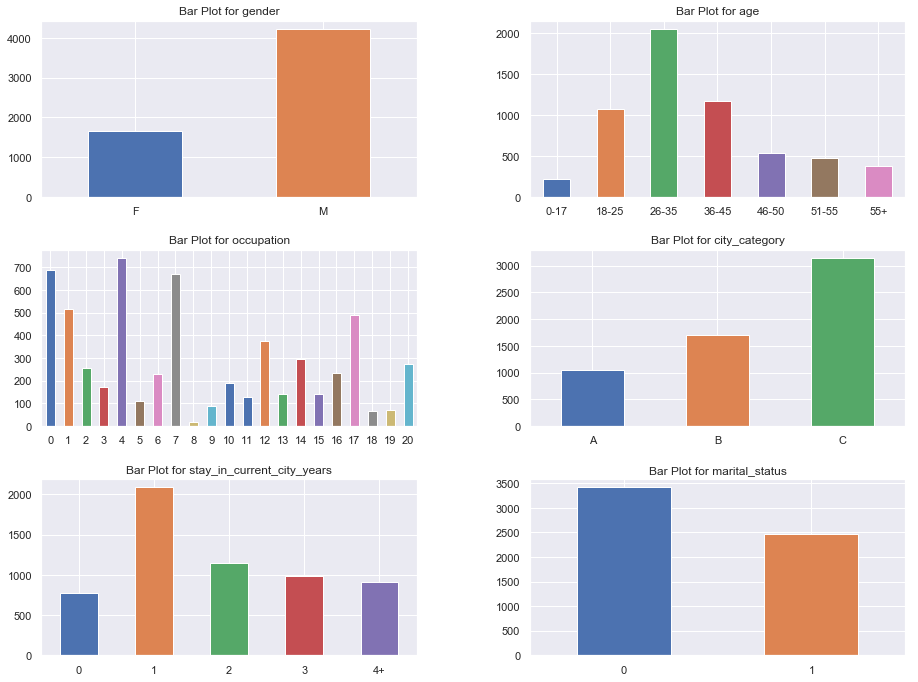

In [20]:
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.3, wspace=0.3)

features = user_info.columns[1:]
for i in range(6):
    ax = fig.add_subplot(4, 2, i + 1)
    ax = plot_bar(user_info, features[i])

Main Findings from the bar plots above:
- There are more male customers than female customers. We'll futhrer investigate gender column since it's our target variable. 
- Out of 5891 customers, there are more than 2000 between 26 and 35 years old. Most purchases are made by customers between 18 and 45 years old. 
- There are 20 categories for occupation. A majority of customers are from categories 0, 1, 4, 7 and 17.
- More than half of the customers are from city category C. It might be due to the location of the store.
- Half of the customers to this store are new to the current city. There is a decreasing trend. The longer the customers stay in current city, the less they purchase at this store. The reason maybe that new people need to buy more stuff for their home. Or becuase that those who live there longer know a better place to buy things. This store may need to pay attention to this problem. 
- Single customers are more than married customers in this store. <br>

A simple conclusion is that this store is popular for male, people living in city C, people between the age of 26 and 35, new to their current city and single persons.  

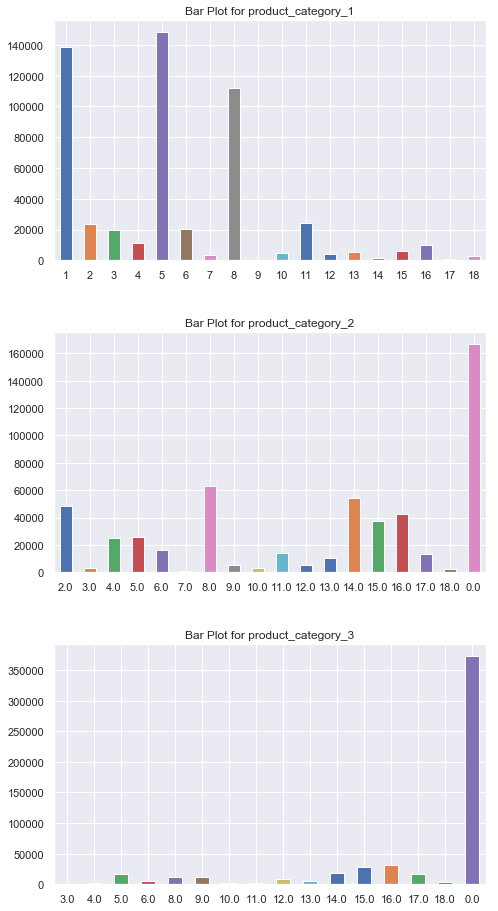

In [21]:
# Plot bar graph for columns product_category_1, product_category_2 and product_category_3
fig = plt.figure(figsize=(6, 12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.3, wspace=0.05)

features = ['product_category_1', 'product_category_2', 'product_category_3']
for i in range(3):
    ax = fig.add_subplot(3, 1, i + 1)
    ax = plot_bar(retail_data, features[i])

From the bar plot of product_category_1, product_category_2, and product_category_3, we find that category 1, 5, 8 are the most popular categories based on product_category_1. There are a lot of null values for the other two categories. 

##### 2.2.1.2 Distribution of numerical variables

In [22]:
user_info[['total_purchase', 'n_purchases']].describe()

,total_purchase,n_purchases
count,5.891000e+03,5891.000000
mean,8.517515e+05,91.253947
std,9.329978e+05,105.929800
min,4.410800e+04,5.000000
25%,2.349140e+05,25.000000
50%,5.126120e+05,53.000000
75%,1.099005e+06,114.000000
max,1.053678e+07,1025.000000


Both of the two numerical variables are quite right skewed. 

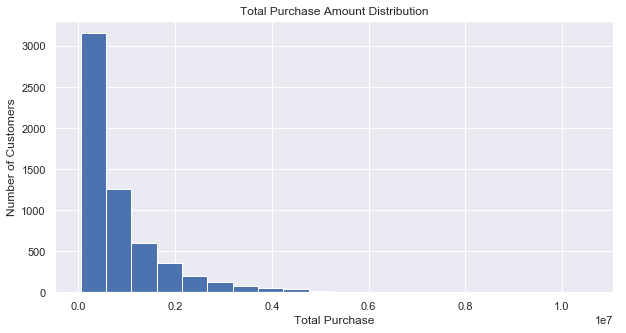

In [23]:
plt.figure(figsize=(10, 5))
user_info.total_purchase.plot(kind='hist', bins=20)
plt.xlabel('Total Purchase')
plt.ylabel('Number of Customers')
plt.title('Total Purchase Amount Distribution');

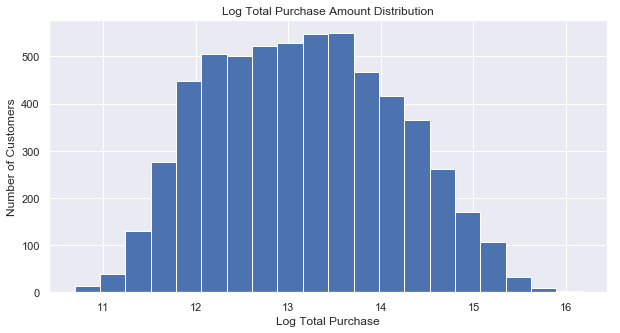

In [24]:
plt.figure(figsize=(10, 5))
np.log(user_info.total_purchase).plot(kind='hist', bins=20)
plt.xlabel('Log Total Purchase')
plt.ylabel('Number of Customers')
plt.title('Log Total Purchase Amount Distribution');

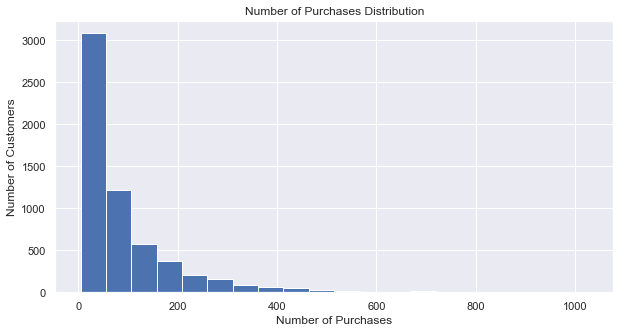

In [25]:
# Histogram for number of purchases
plt.figure(figsize=(10, 5))
user_info.n_purchases.plot(kind='hist', bins=20)
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.title('Number of Purchases Distribution');

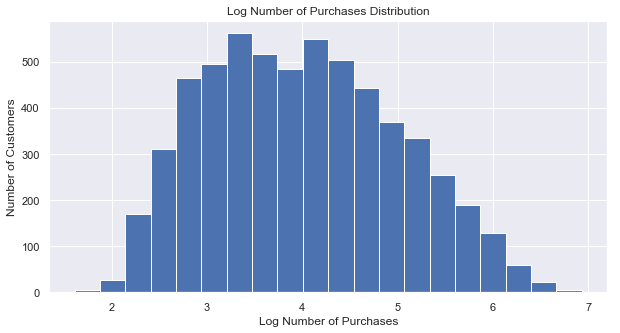

In [26]:
# Histogram for log number of purchases
plt.figure(figsize=(10, 5))
np.log(user_info.n_purchases).plot(kind='hist', bins=20)
plt.xlabel('Log Number of Purchases')
plt.ylabel('Number of Customers')
plt.title('Log Number of Purchases Distribution');

#### 2.2.2 Bivariate Analysis

##### 2.2.2.1 Gender Related Analysis 

Now let's visualize and understand the relationship between our target variable 'gender' and predictors.

###### 2.2.2.1.1 More Analysis on Gender Itself

In [27]:
# How many male customers? How many female customers?
gender_counts = user_info.gender.value_counts()
gender_counts

M    4225
F    1666
Name: gender, dtype: int64

In [28]:
# Proportion of male and female customers
gender_prop = gender_counts / len(user_info.gender)
gender_prop

M    0.717196
F    0.282804
Name: gender, dtype: float64

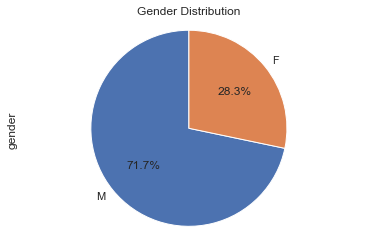

In [29]:
user_info.gender.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal');

Specifically, 28.3% of customers purchasing in this store are female, 71.7% are male.

###### 2.2.2.1.2 Gender and Purchase

In [30]:
# Total purchase amount (in $1000) by gender
tp_by_gen = user_info.groupby('gender')['total_purchase'].sum()
tp_by_gen_in_thd = tp_by_gen/1000
tp_by_gen_in_thd

gender
F    1164624.021
M    3853044.357
Name: total_purchase, dtype: float64

In [31]:
# Proportion of purchase amount made by female and male respectively
p_by_gen_prop = tp_by_gen / user_info['total_purchase'].sum()
p_by_gen_prop

gender
F    0.232105
M    0.767895
Name: total_purchase, dtype: float64

Male customers account for 71.7% of all customers, they are spending 76.8% of all purchase amount of this store. 

In [32]:
# Average purchase amount (in $1000) by female and male
ap_by_gen = tp_by_gen / user_info.gender.value_counts()
ap_by_gen_in_thd = ap_by_gen / 1000
ap_by_gen_in_thd

F    699.054034
M    911.963161
dtype: float64

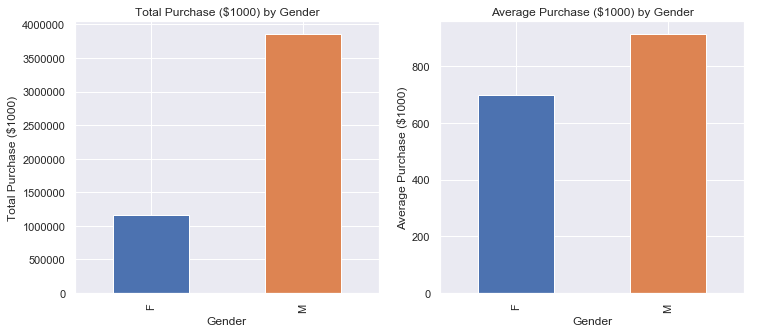

In [33]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
tp_by_gen_in_thd.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Total Purchase ($1000)')
plt.title('Total Purchase ($1000) by Gender')
plt.subplot(122)
ap_by_gen_in_thd.plot(kind='bar')
plt.ylabel('Average Purchase ($1000)')
plt.title('Average Purchase ($1000) by Gender')
plt.xlabel('Gender');

By comparison, we see that in total amount male customers are spending much more than female customers. While the difference decreases in average amount spent. 

In [34]:
p_by_gen = pd.concat([gender_counts, gender_prop * 100, tp_by_gen, p_by_gen_prop * 100, ap_by_gen],
                       axis=1, sort=True)
p_by_gen.columns = ['count', 'gender_proportion (%)', 'total_purchase', 'purchase_proportion (%)', 'average_purchase']
p_by_gen

,count,gender_proportion (%),total_purchase,purchase_proportion (%),average_purchase
F,1666,28.280428,1164624021,23.210462,699054.034214
M,4225,71.719572,3853044357,76.789538,911963.161420


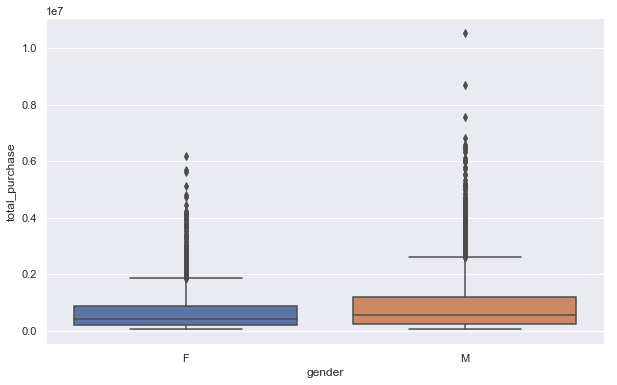

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='total_purchase', data=user_info);

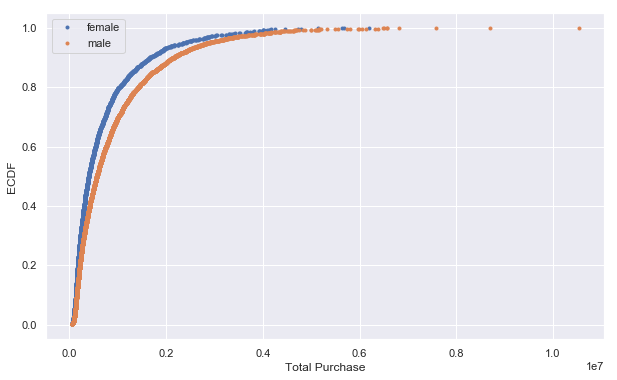

In [36]:
# Plot empirical cumulative distribution for female and male consumers
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)

    x = np.sort(data)
    y  = np.arange(1, n+1) / n

    return x, y

x_fem, y_fem = ecdf(user_info[user_info['gender'] == 'F'].total_purchase)
x_male, y_male = ecdf(user_info[user_info['gender'] == 'M'].total_purchase)

plt.figure(figsize=(10, 6))
plt.plot(x_fem, y_fem, marker='.', linestyle='none')
plt.plot(x_male, y_male, marker='.', linestyle='none')
plt.xlabel('Total Purchase')
plt.ylabel('ECDF')
plt.legend(('female', 'male'));

In [37]:
# Conduct a two-sided test for the null hypothesis that two samples of female purchase 
# and male purchase are drawn from the same distribution
from scipy import stats

stats.ks_2samp(user_info[user_info['gender'] == 'F'].total_purchase, 
              user_info[user_info['gender'] == 'M'].total_purchase)

Ks_2sampResult(statistic=0.12196907165232951, pvalue=5.64334083670315e-16)

p-value is extremely small, then we reject the null that the distributions of the two samples are the same.

In [38]:
# Conduct a two sided test for the null hypothesis that female average purchase and male average purchase
# are the same.
stats.ttest_ind(user_info[user_info['gender'] == 'F'].total_purchase, 
              user_info[user_info['gender'] == 'M'].total_purchase, equal_var=False)

Ttest_indResult(statistic=-8.65416276342633, pvalue=7.282558708079996e-18)

p-value is also extremely small for this test, thus we reject the null that two samples have identical means.

In [39]:
# number of purchases by female and male 
np_by_gen = user_info.groupby('gender').n_purchases.sum()
np_by_gen

gender
F    132197
M    405380
Name: n_purchases, dtype: int64

Total number of purchases made by female customers is 132197, male customers is 405380. 

In [40]:
anp_by_gen = np_by_gen / user_info.gender.value_counts()
anp_by_gen

F    79.349940
M    95.947929
dtype: float64

Female customers purchased around 79 times on average, male customers purchased around 96 times on average.

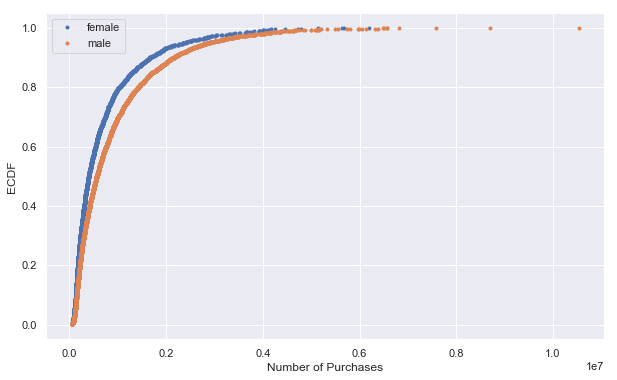

In [41]:
x_f, y_f = ecdf(user_info[user_info['gender'] == 'F'].n_purchases)
x_m, y_m= ecdf(user_info[user_info['gender'] == 'M'].n_purchases)

plt.figure(figsize=(10, 6))
plt.plot(x_fem, y_fem, marker='.', linestyle='none')
plt.plot(x_male, y_male, marker='.', linestyle='none')
plt.xlabel('Number of Purchases')
plt.ylabel('ECDF')
plt.legend(('female', 'male'));

In [42]:
# Conduct a two-sided test for the null hypothesis that two samples of number of purchases for female
# and male are drawn from the same distribution
stats.ks_2samp(user_info[user_info['gender'] == 'F'].n_purchases, 
              user_info[user_info['gender'] == 'M'].n_purchases)

Ks_2sampResult(statistic=0.0965294046612728, pvalue=3.6437051342156436e-10)

In [43]:
# Conduct a two sided test for the null hypothesis that female average number of purchases and male average number of 
# purchases are the same.
stats.ttest_ind(user_info[user_info['gender'] == 'F'].total_purchase, 
              user_info[user_info['gender'] == 'M'].total_purchase, equal_var=False)

Ttest_indResult(statistic=-8.65416276342633, pvalue=7.282558708079996e-18)

P-value for both two tests are extremely small, we reject the null hypothesis that number of purchases for female and male are drawn from the same distribution and their mean are equal. 

###### 2.2.2.1.3 Gender and Age

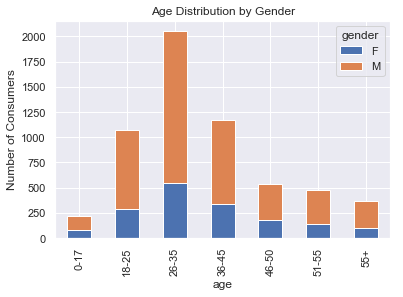

In [44]:
user_info.groupby(['age', 'gender'])['user_id'].count().unstack().plot(kind='bar', stacked=True)
plt.title('Age Distribution by Gender')
plt.ylabel('Number of Consumers');

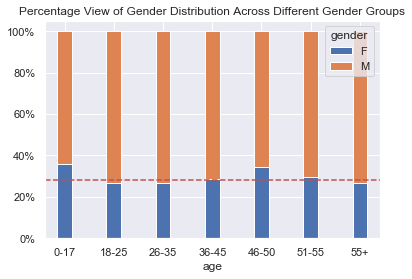

In [45]:
import matplotlib.ticker as mtick
user_info.groupby(['age', 'gender'])['user_id'].size().groupby(level=0).apply(
            lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', width=0.3, stacked=True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation='horizontal')
plt.axhline(y=28.3, color='r', linestyle='--')
plt.title('Percentage View of Gender Distribution Across Different Gender Groups');

There are relatively more female customers for age group 0-17 and 46-50. 

###### 2.2.2.1.4 Gender and Occupation

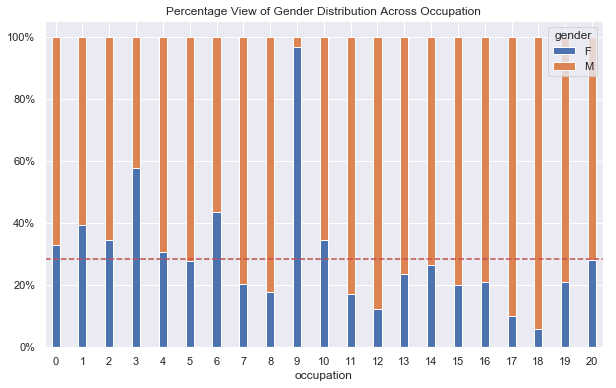

In [46]:
user_info.groupby(['occupation', 'gender'])['user_id'].count().groupby(level=0).apply(
            lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', width=0.3, figsize=(10, 6), stacked=True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation='horizontal')
plt.axhline(y=28.3, color='r', linestyle='--')
plt.title('Percentage View of Gender Distribution Across Occupation');

Most of the customers with occupation category 9 are female. Occupation 17 and 18 are dominated by male. Gender distribution for categories such as 4, 5, 14, and 20 are pretty the same as the whole sample distribution of gender at this store. 

###### 2.2.2.1.5 Gender and City Category

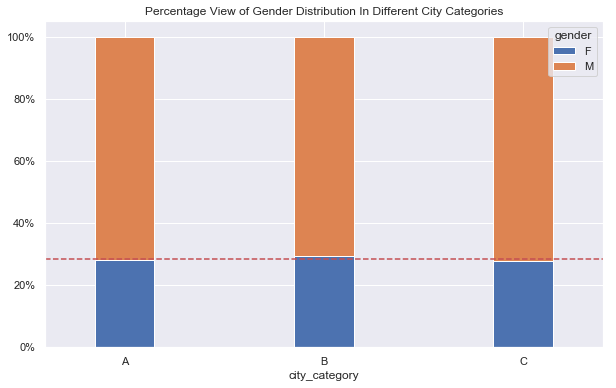

In [47]:
user_info.groupby(['city_category', 'gender'])['user_id'].count().groupby(level=0).apply(
            lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', width=0.3, figsize=(10, 6), stacked=True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.axhline(y=28.3, color='r', linestyle='--')
plt.xticks(rotation='horizontal')
plt.title('Percentage View of Gender Distribution In Different City Categories');

Gender distribution in each city category is nearly the same as the whole gender distribution in this store. 

###### 2.2.2.1.6 Gender and Stay in Current City Years

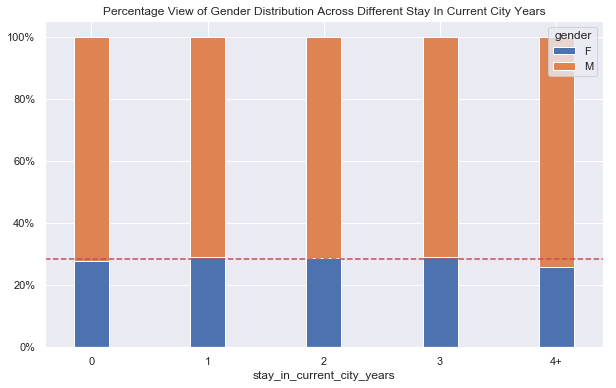

In [48]:
user_info.groupby(['stay_in_current_city_years', 'gender'])['user_id'].count().groupby(level=0).apply(
            lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', width=0.3, figsize=(10, 6), stacked=True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.axhline(y=28.3, color='r', linestyle='--')
plt.xticks(rotation='horizontal')
plt.title('Percentage View of Gender Distribution Across Different Stay In Current City Years');

Gender distribution in each category for stay_in_current_city_years feature is nearly the same as the whole gender distribution in this store except that for category 4+ there are slightly more male. 

###### 2.2.2.1.7 Gender and Marital Status

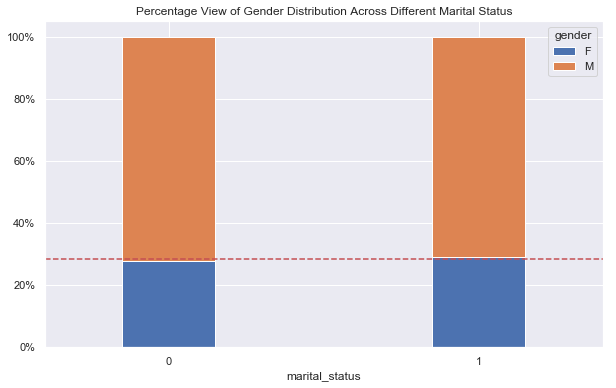

In [49]:
user_info.groupby(['marital_status', 'gender'])['user_id'].count().groupby(level=0).apply(
            lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', width=0.3, figsize=(10, 6), stacked=True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.axhline(y=28.3, color='r', linestyle='--')
plt.xticks(rotation='horizontal')
plt.title('Percentage View of Gender Distribution Across Different Marital Status');

Gender proportion for single and married, and the whole population at this store is nealy identical.

###### 2.2.2.1.8 Gender and Product Category 1

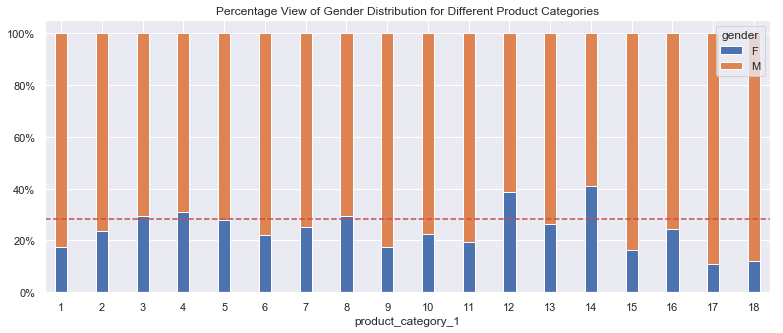

In [50]:
retail_data.groupby(['product_category_1', 'gender'])['product_category_1'].count().groupby(level=0).apply(
            lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', width=0.3, figsize=(13, 5), stacked=True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.axhline(y=28.3, color='r', linestyle='--')
plt.xticks(rotation='horizontal')
plt.title('Percentage View of Gender Distribution for Different Product Categories');

For categories 3, 4, 5, 8, and 13, the distribution of gender is nearly the same as the distribution at this store. For categories 1, 9, 12, 14, 15, 17, 18, proportion of female and male customers are not the same as the store's. 

###### 2.2.2.1.9 Gender and Products

In [51]:
# Check product_id column first
retail_data.product_id.value_counts()

P00265242    1858
P00110742    1591
P00025442    1586
P00112142    1539
P00057642    1430
P00184942    1424
P00046742    1417
P00058042    1396
P00059442    1384
P00145042    1384
P00237542    1374
P00255842    1354
P00117942    1346
P00110942    1336
P00010742    1331
P00110842    1260
P00220442    1253
P00051442    1233
P00102642    1228
P00117442    1227
P00278642    1213
P00242742    1194
P00034742    1188
P00080342    1186
P00148642    1179
P00028842    1172
P00031042    1168
P00251242    1167
P00114942    1162
P00270942    1141
             ... 
P00107942       1
P00307042       1
P00203242       1
P00065542       1
P00228842       1
P00301442       1
P00008942       1
P00066342       1
P00069642       1
P00083542       1
P00215142       1
P00167242       1
P00185942       1
P00164242       1
P00314742       1
P00013442       1
P00239442       1
P00142542       1
P00298842       1
P00144942       1
P00292142       1
P00107442       1
P00063442       1
P00062442       1
P00211742 

The top seller is purchased by 1858 customers, and many of the products are bought by only one customer. 

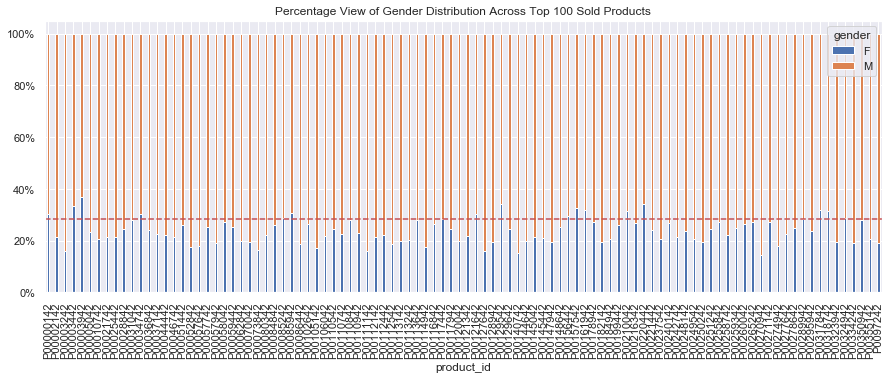

In [52]:
# Check gender distribution for each of the top 100 products
top100_id = retail_data.product_id.value_counts().iloc[:100].index.tolist()
top100_df = retail_data.loc[retail_data['product_id'].isin(top100_id)]
top100_df.groupby(['product_id', 'gender'])['user_id'].count().groupby(level=0).apply(
            lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', width=0.3, figsize=(15, 5), stacked=True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.axhline(y=28.3, color='r', linestyle='--')
#plt.xticks(rotation='horizontal')
plt.title('Percentage View of Gender Distribution Across Top 100 Sold Products');

There does exist some variance in gender distribution which may help us when modeling gender prediction. 

In [53]:
# Select a threshold of 5, to extract the products from top 100 sold for which gender proportion is at least 5% different
# than the gender proportion of this store
lower = 28.3 - 5
upper = 28.3 + 5
top100_df_by_gen = top100_df.groupby(['product_id', 'gender'])['user_id'].count().groupby(level=0).apply(
            lambda x: 100 * x / x.sum()).unstack()
prod_ls_in = (top100_df_by_gen[(top100_df_by_gen.F > 38.3) | (top100_df_by_gen.F < 18.3)]).index.tolist()
prod_ls_in

['P00003242',
 'P00052842',
 'P00057642',
 'P00073842',
 'P00105142',
 'P00111142',
 'P00114942',
 'P00127642',
 'P00140742',
 'P00270942',
 'P00274942']

##### 2.2.2.2 Other Bivariate Analysis

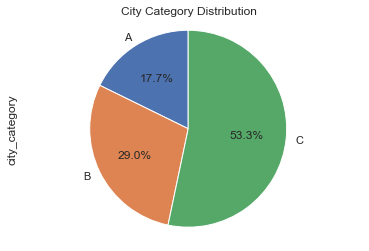

In [54]:
user_info.city_category.value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('City Category Distribution')
plt.axis('equal');

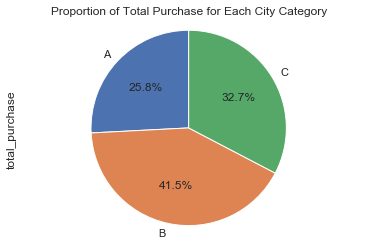

In [55]:
user_info.groupby('city_category').total_purchase.sum().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Total Purchase for Each City Category')
plt.axis('equal');

Although number of consumers in city B are in the middle accounting for 29% of all consumers of this store, their purchasing power is the highest among all three city categories, around 41.5% of total purchase amount is bought by customers from city category B. 

## 3. Machine Learning

### 3.1 Introduction

This is a supervised learning problem. We are given labeled data, e.g. we already know the gender of each customer. Classification algorithms will be used to classify the gender or customers. We have two classes, female and male. 

Some classification algorithms to be explored:
- Logistic Regression
- K-Nearest Neighbors
- Support Vector Machine
- Random Forest Classifier
- Gradient Boosting Classifier

Evaluation metrics to be used:
- Accuracy score
- Metrics from confusion matrix and classification report: recall, precision, f1 score
- ROC curve and Area under ROC curve 

### 3.2 Data Preprocessing

#### 3.2.1 Standardizing Numerical Data

In [56]:
user_info[['total_purchase', 'n_purchases']].describe()

,total_purchase,n_purchases
count,5.891000e+03,5891.000000
mean,8.517515e+05,91.253947
std,9.329978e+05,105.929800
min,4.410800e+04,5.000000
25%,2.349140e+05,25.000000
50%,5.126120e+05,53.000000
75%,1.099005e+06,114.000000
max,1.053678e+07,1025.000000


These two features are on different scales and total_purchase has high variance. I will apply log transformation.

In [57]:
user_info[['total_purchase_log', 'n_purchases_log']] = np.log(user_info[['total_purchase', 'n_purchases']])

#### 3.2.2 Encoding Categorical Data

In [58]:
# Include products with big enough variations in gender proportion, and aggregate them into customer level
prod_df =  retail_data[retail_data.product_id.isin(prod_ls_in)]
prod_df_dum = pd.get_dummies(prod_df[['user_id', 'product_id']], columns=['product_id'])
prod_df_dum.head()

,user_id,product_id_P00003242,product_id_P00052842,product_id_P00057642,product_id_P00073842,product_id_P00105142,product_id_P00111142,product_id_P00114942,product_id_P00127642,product_id_P00140742,product_id_P00270942,product_id_P00274942
9,1000005,0,0,0,0,0,0,0,0,0,0,1
41,1000010,0,0,0,0,0,1,0,0,0,0,0
53,1000013,0,0,0,0,0,0,0,0,1,0,0
69,1000017,0,0,0,1,0,0,0,0,0,0,0
118,1000023,0,0,0,0,0,0,0,0,0,1,0


In [59]:
# Convert the above data frame into customer level and then merge with user_info data frame
prod = prod_df_dum.groupby('user_id').sum().reset_index()
user_df = user_info.merge(prod, how='left').fillna(0)
user_df.shape

(5891, 22)

In [60]:
# Aggregate product_category_1 to customer level and then merge with user_df 
prod_cat_dum = pd.get_dummies(retail_data[['user_id', 'product_category_1']], columns=['product_category_1'])
prod_cat_df = prod_cat_dum.groupby('user_id').sum().reset_index()
user = user_df.merge(prod_cat_df)
user.shape

(5891, 40)

In [61]:
# Encoding ordinal categorical variables using LabelEncoder()
cols = ['age', 'gender', 'stay_in_current_city_years']
for c in cols:
    le = preprocessing.LabelEncoder()
    user[c] = le.fit_transform(user[c])

In [62]:
# Encoding nominal categorical variables using get_dummies()
user = pd.get_dummies(user, columns=['occupation'])
user.head()

,user_id,gender,age,city_category,stay_in_current_city_years,marital_status,total_purchase,n_purchases,total_purchase_log,n_purchases_log,...,occupation_11,occupation_12,occupation_13,occupation_14,occupation_15,occupation_16,occupation_17,occupation_18,occupation_19,occupation_20
0,1000001,0,0,A,2,0,333481,34,12.717341,3.526361,...,0,0,0,0,0,0,0,0,0,0
1,1000002,1,6,C,4,0,810353,76,13.605225,4.330733,...,0,0,0,0,0,1,0,0,0,0
2,1000003,1,2,A,3,0,341635,29,12.741498,3.367296,...,0,0,0,0,1,0,0,0,0,0
3,1000004,1,4,B,2,1,205987,13,12.235568,2.564949,...,0,0,0,0,0,0,0,0,0,0
4,1000005,1,2,A,1,1,821001,106,13.618280,4.663439,...,0,0,0,0,0,0,0,0,0,1


### 3.3 Model Comparison

In [63]:
# Selecting features and then split into training and testing data sets
X = user.drop(['user_id', 'gender', 'city_category', 'marital_status', 'total_purchase', 'n_purchases'], axis=1)
y = user['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [64]:
def plot_roc_curve(model, X_test, y_test):
    '''Construct a function for plotting roc curve'''
    y_score = model.decision_function(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    plt.figure(figsize=(8, 6))
    plt.plot([0, 1], [0, 1], 'k--', label='ROC curve (area = %0.4f)' % roc_auc_score(y_test, y_score))
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right');

#### 3.3.1 Logistic Regression

In [65]:
# Grid Search Best Prams for LR model and fit the training data
c_space = np.logspace(-35, -15, 20)
param_space = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_space, scoring='accuracy', cv=5)
logreg_cv.fit(X_train, y_train)

best_c = logreg_cv.best_params_['C']
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 1, 'penalty': 'l2'}
Best score is 0.7661837935717519


In [66]:
print('Testing accuracy is ', logreg_cv.score(X_test, y_test))
print('Training accuracy is ', logreg_cv.score(X_train, y_train))

Testing accuracy is  0.7746096401900883
Training accuracy is  0.7702580353100951


In [67]:
y_pred = logreg_cv.predict(X_test)

print('\nClassification report: \n', classification_report(y_test, y_pred))


Classification report: 
              precision    recall  f1-score   support

          0       0.75      0.30      0.43       416
          1       0.78      0.96      0.86      1057

avg / total       0.77      0.77      0.74      1473



In [68]:
# Function for plotting confusion matrix and normalized confusion matrix

class_names = ['Female', 'Male']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[ 125  291]
 [  41 1016]]
Normalized confusion matrix
[[0.3  0.7 ]
 [0.04 0.96]]


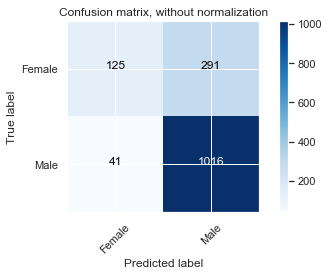

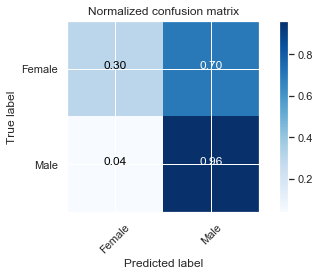

In [69]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

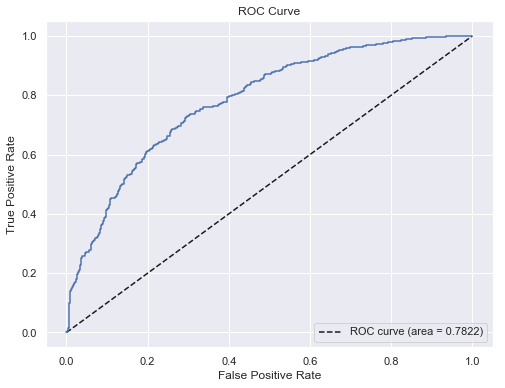

In [70]:
plot_roc_curve(logreg_cv, X_test, y_test)

In [71]:
# Check Logistic Regression Coefficients
logreg = LogisticRegression(C=1, penalty='l2')
logreg.fit(X_train, y_train)

coef = logreg.coef_.ravel()
coef_df = pd.DataFrame(coef, index=X_train.columns, columns=['coefficient'])
coef_df

,coefficient
age,0.045972
stay_in_current_city_years,0.016513
total_purchase_log,0.209692
n_purchases_log,-0.255029
product_id_P00003242,0.214397
product_id_P00052842,0.136635
product_id_P00057642,0.216880
product_id_P00073842,0.199635
product_id_P00105142,0.304697
product_id_P00111142,0.147294


After checking all the signs of coefficient estimates from logistic regression which describing the direction of the relationship between a predictor and the target variable, we find no counter-intuitive estimate. 

#### 3.3.2 K-Nearest Neighbors Classifier

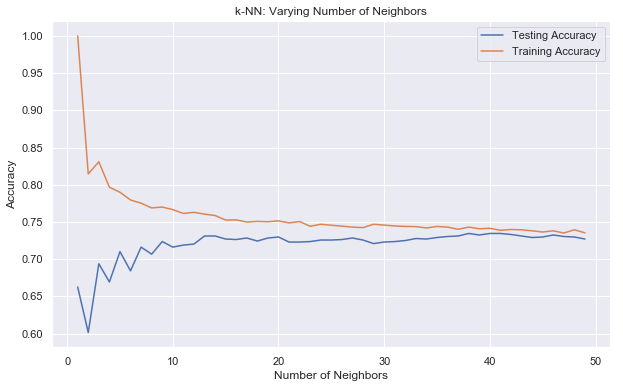

In [72]:
neighbors = np.arange(1, 50)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
     
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.figure(figsize=(10, 6))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy');

In [73]:
# Tuning hyperparameter n_neighbors
param_k = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_k, scoring='accuracy', cv=5)
knn_cv.fit(X_train, y_train)

best_k = knn_cv.best_params_['n_neighbors']
print('Best K is ', knn_cv.best_params_)
print('Best score is ', knn_cv.best_score_)

Best K is  {'n_neighbors': 29}
Best score is  0.7299683114531462


In [74]:
print('Training accuracy is ', knn_cv.score(X_train, y_train))
print('Testing accuracy is ', knn_cv.score(X_test, y_test))

Training accuracy is  0.7469443186962427
Testing accuracy is  0.7209775967413442


In [75]:
y_pred_knn = knn_cv.predict(X_test)

print('\nClassification Report: \n', classification_report(y_test, y_pred_knn))


Classification Report: 
              precision    recall  f1-score   support

          0       0.52      0.15      0.23       416
          1       0.74      0.95      0.83      1057

avg / total       0.68      0.72      0.66      1473



Confusion matrix, without normalization
[[  62  354]
 [  57 1000]]
Normalized confusion matrix
[[0.15 0.85]
 [0.05 0.95]]


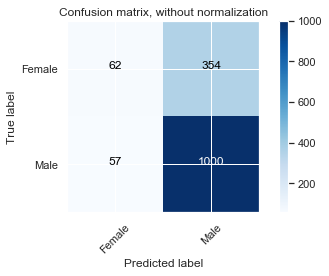

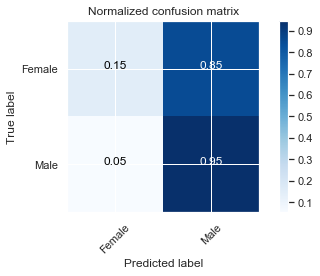

In [76]:
cnf_matrix = confusion_matrix(y_test, y_pred_knn)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

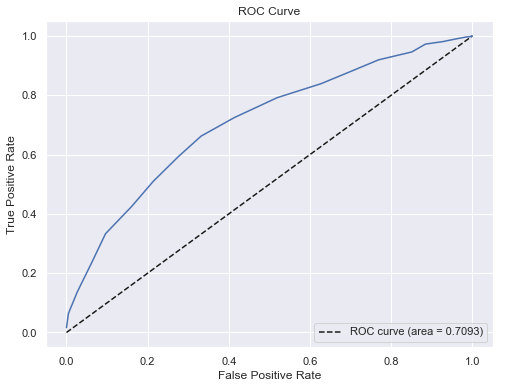

In [77]:
y_score = knn_cv.predict_proba(X_test)[:, 1]
    
fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', label='ROC curve (area = %0.4f)' % roc_auc_score(y_test, y_score))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right');

#### 3.3.3 SVC

In [78]:
# Try linear SVC first
params_grid = {'C': [0.001, 0.01, 0.1, 1]}
svc_linear = LinearSVC(random_state=0)
svc_linear_cv = GridSearchCV(svc_linear, params_grid, scoring='accuracy', cv=5)
svc_linear_cv.fit(X_train, y_train)

print("Best Parameter is: {}".format(svc_linear_cv.best_params_)) 
print("Best score is {}".format(svc_linear_cv.best_score_))

print('Training accuracy is ', svc_linear_cv.score(X_train, y_train))
print('Testing accuracy is ', svc_linear_cv.score(X_test, y_test))

Best Parameter is: {'C': 0.01}
Best score is 0.7573562698053418
Training accuracy is  0.7627885921231327
Testing accuracy is  0.7651052274270197


In [79]:
y_pred = svc_linear_cv.predict(X_test)

print('\nClassification Report: \n', classification_report(y_test, y_pred))


Classification Report: 
              precision    recall  f1-score   support

          0       0.78      0.23      0.36       416
          1       0.76      0.97      0.86      1057

avg / total       0.77      0.77      0.72      1473



Confusion matrix, without normalization
[[  97  319]
 [  27 1030]]
Normalized confusion matrix
[[0.23 0.77]
 [0.03 0.97]]


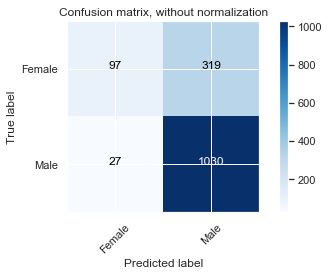

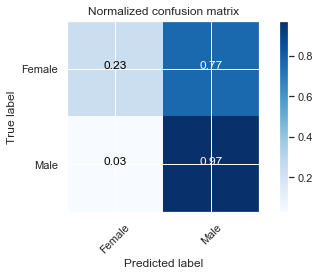

In [80]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

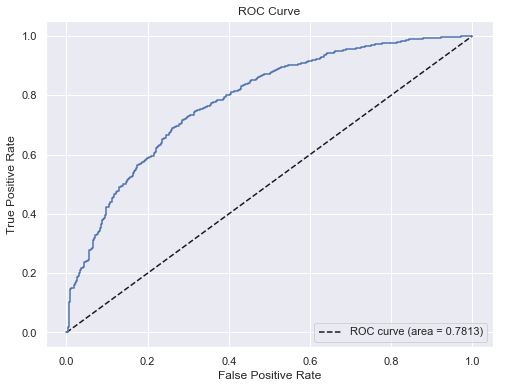

In [81]:
plot_roc_curve(svc_linear_cv, X_test, y_test)

In [82]:
# Try rbf kernal
params_grid = {'C': [1e5, 1e6, 1e7], 'gamma':  [1e-6, 1e-7, 1e-8]}
svc_rbf= SVC(random_state=0)
svc_rbf_cv = GridSearchCV(svc_rbf, params_grid, scoring='accuracy', cv=5)
svc_rbf_cv.fit(X_train, y_train)

print("Best Parameter is: {}".format(svc_linear_cv.best_params_)) 
print("Best score is {}".format(svc_linear_cv.best_score_))

print('Training accuracy is ', svc_linear_cv.score(X_train, y_train))
print('Testing accuracy is ', svc_linear_cv.score(X_test, y_test))

Best Parameter is: {'C': 0.01}
Best score is 0.7573562698053418
Training accuracy is  0.7627885921231327
Testing accuracy is  0.7651052274270197


In [83]:
y_pred = svc_rbf_cv.predict(X_test)

print('\nClassification Report: \n', classification_report(y_test, y_pred))


Classification Report: 
              precision    recall  f1-score   support

          0       0.74      0.26      0.38       416
          1       0.77      0.96      0.85      1057

avg / total       0.76      0.77      0.72      1473



Confusion matrix, without normalization
[[ 108  308]
 [  38 1019]]
Normalized confusion matrix
[[0.26 0.74]
 [0.04 0.96]]


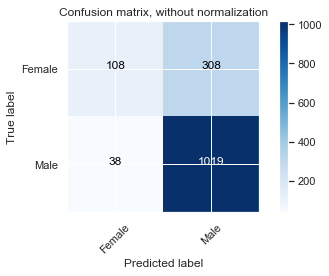

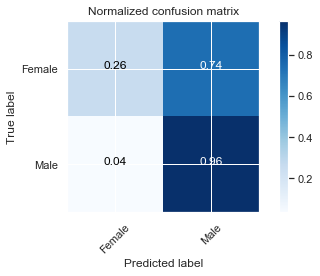

In [84]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

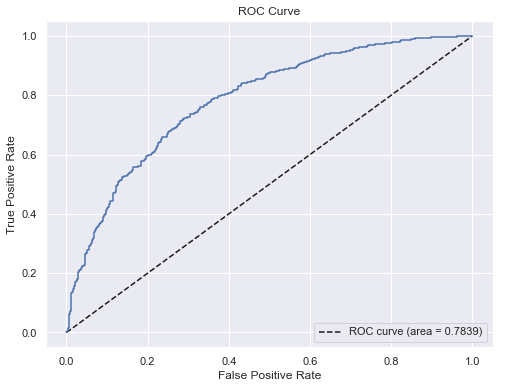

In [85]:
plot_roc_curve(svc_rbf_cv, X_test, y_test)

#### 3.3.4 Random Forest Classifier

In [86]:
# First try with default values 
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

print('Training accuracy is ', rf.score(X_train, y_train))
print('Testing accuracy is ', rf.score(X_test, y_test))

Training accuracy is  0.9909461294703485
Testing accuracy is  0.7372708757637475


In [87]:
# Tuning Parameters
param_grid = {'max_depth': range(3, 14, 2), 'min_samples_split':range(50, 201, 20)}
rf = RandomForestClassifier(n_estimators=200, random_state=0, oob_score=True)
rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X_train, y_train)

print("Best Parameter is: {}".format(rf_cv.best_params_)) 
print("Best score is {}".format(rf_cv.best_score_))

print('Training accuracy is ', rf_cv.score(X_train, y_train))
print('Testing accuracy is ', rf_cv.score(X_test, y_test))

Best Parameter is: {'max_depth': 13, 'min_samples_split': 50}
Best score is 0.7523766410140335
Training accuracy is  0.7897238569488456
Testing accuracy is  0.7630685675492193


In [88]:
rf = RandomForestClassifier(n_estimators=200, random_state=0, oob_score=True, max_depth=13, min_samples_split=50)
rf.fit(X_train, y_train)

print('Score of the training dataset obtained using an out-of-bag samples is ', rf.oob_score_)

Score of the training dataset obtained using an out-of-bag samples is  0.7544137618832051


In [89]:
y_pred = rf_cv.predict(X_test)

print('\nClassification report: \n', classification_report(y_test, y_pred))


Classification report: 
              precision    recall  f1-score   support

          0       0.80      0.22      0.34       416
          1       0.76      0.98      0.86      1057

avg / total       0.77      0.76      0.71      1473



Confusion matrix, without normalization
[[  90  326]
 [  23 1034]]
Normalized confusion matrix
[[0.22 0.78]
 [0.02 0.98]]


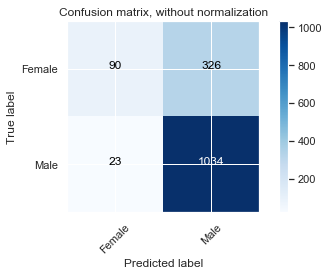

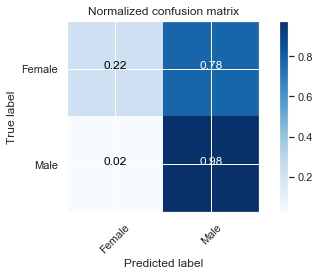

In [90]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

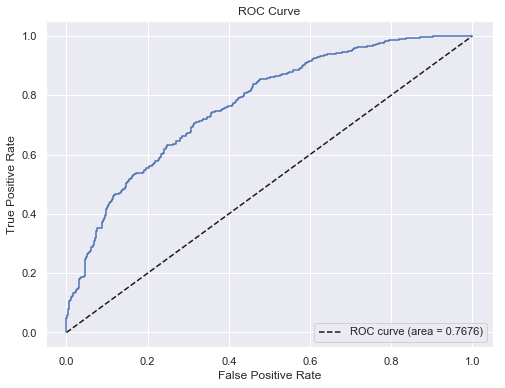

In [91]:
y_score = rf_cv.predict_proba(X_test)[:, 1]
    
fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', label='ROC curve (area = %0.4f)' % roc_auc_score(y_test, y_score))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right');

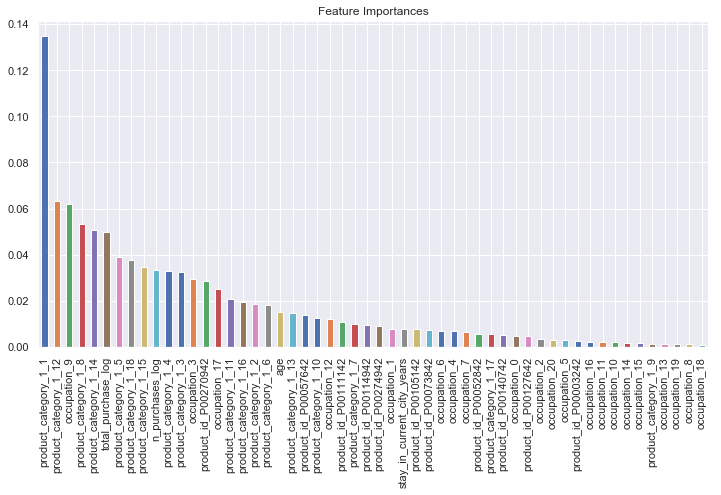

In [92]:
# Visualize Feature Importances
plt.figure(figsize=(12, 6))
feat_imp = pd.Series(rf.feature_importances_, X_train.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances');

Product_category_1_1 is the most informative feature for identifying female and male customers.

#### 3.3.5 Gradient Boosting Classifier

In [93]:
# Try with default setting
clf = GradientBoostingClassifier(random_state=0, n_estimators=200).fit(X_train, y_train)

print('Training accuracy of default model is ', clf.score(X_train, y_train))
print('Testing accuracy of default model is ', clf.score(X_test, y_test))

Training accuracy of default model is  0.8327297419646899
Testing accuracy of default model is  0.7671418873048201


In [94]:
# Tuning Parameters
params = {'max_depth': np.linspace(1, 10, 10), 'max_features': [2, 5, 8, 10]}
gbc = GradientBoostingClassifier(n_estimators=200, random_state=0)
gbc_cv = GridSearchCV(gbc, params, cv=5)
gbc_cv.fit(X_train, y_train)

print("Best Parameter is: {}".format(gbc_cv.best_params_)) 
print("Best score is {}".format(gbc_cv.best_score_))

print('Training accuracy is ', gbc_cv.score(X_train, y_train))
print('Testing accuracy is ',gbc_cv.score(X_test, y_test))

Best Parameter is: {'max_depth': 3.0, 'max_features': 8}
Best score is 0.7666364870982345
Training accuracy is  0.8166591217745586
Testing accuracy is  0.7725729803122878


In [95]:
print('Training accuracy is ', gbc_cv.score(X_train, y_train))
print('Testing accuracy is ',gbc_cv.score(X_test, y_test))

Training accuracy is  0.8166591217745586
Testing accuracy is  0.7725729803122878


In [96]:
gbc_cv.best_params_

{'max_depth': 3.0, 'max_features': 8}

In [97]:
y_pred = gbc_cv.predict(X_test)

print('\nClassification report: \n', classification_report(y_test, y_pred))


Classification report: 
              precision    recall  f1-score   support

          0       0.68      0.36      0.47       416
          1       0.79      0.93      0.86      1057

avg / total       0.76      0.77      0.75      1473



Confusion matrix, without normalization
[[150 266]
 [ 69 988]]
Normalized confusion matrix
[[0.36 0.64]
 [0.07 0.93]]


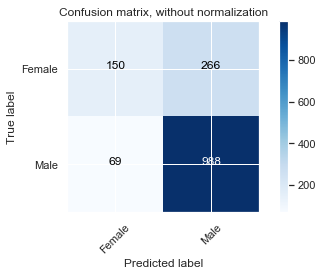

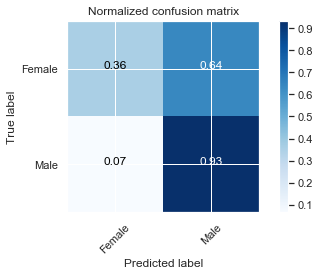

In [98]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

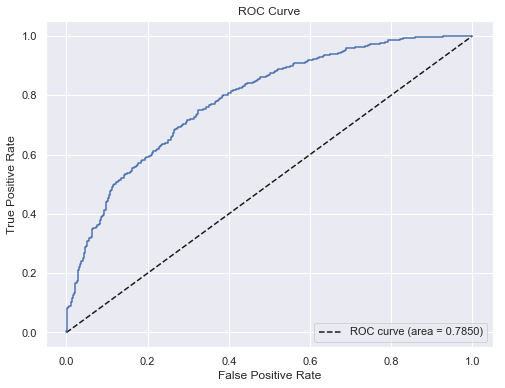

In [99]:
y_score = gbc_cv.predict_proba(X_test)[:, 1]
    
fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', label='ROC curve (area = %0.4f)' % roc_auc_score(y_test, y_score))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right');

For all the five models we have tried in this project, logistic regression and gradient boosting classifier perfomrs the best. By comparison, gradient boosting is more balanced in labeling female and male customers, while logistic regression performs great in labeling male customers. 